### 2.2 Question 2

Download the Iris dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/. The dataset can be downloaded from iris.data. Load the data into a pandas dataframe.
For this lab, we’re going to be performing a binary classification problem,
but this dataset has 3 classes: setosa, virginica, and versicolor. So we want
to take this multi-class problem and transform it into a binary classification.
Create a new column for the dataset called target. The value of target
will be 1 if the row contains a setosa flower, else the value is $0$. There should
be $\frac{1}{3}$ rows with the value of $1$, the rest should be $0$.

In [3]:
import pandas as pd
import numpy as np

# Defining the fielpath
filepath = "/content/data/iris.data" 

def load_data(filepath):
    
    # This part reads the data and avoids to use the first row as the column name
    df = pd.read_csv(filepath, header = None)
    
    # After that the column names for the Dataset are assigned
    col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
    df.columns = col_names  
    
    # Then the column "tareget" is created and filled with ceros
    df['target']  = 0
    
    # Then the values in "target" column are modified depending if the Specie is or not a Setosa
    df.loc[df['Species'] == 'Iris-setosa', 'target'] = 1
    
    return df

# The previous function is called
iris  = load_data(filepath)
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


### 2.3 Question 3
For this question we want to take this dataset of 150 rows, and split it into
a train, test, and validation dataset, using the following proportions for each
split:

• Training: 70%

• Validation: 10%

• Testing: 20%

Sample data for each subset using stratified sampling. I.e. the training data should have roughly $\frac{1}{3}$
positive samples, the testing and validation dataset should also have roughly $\frac{1}{3}$ positive samples.


In [4]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
def slipt_data(df, column):
    
    values = list(df[column].unique())
    
    training_set = pd.DataFrame()
    testing_set = pd.DataFrame()
    validation_set = pd.DataFrame()
    
    for value in values:
        
        data = df[df[column] == value]
        train=data.sample(n = 35,random_state=42)
        test=data.drop(train.index)
        validation = test.sample(n=5,random_state=42)
        test=test.drop(validation.index)
        
        training_set = pd.concat([training_set, train])
        testing_set = pd.concat([testing_set, test])
        validation_set = pd.concat([validation_set, validation])

    return training_set, testing_set, validation_set

In [6]:
training_set, testing_set, validation_set = slipt_data(iris, 'Species')

### 2.4 Question 4
Using the linear regression model you created in the previous lecture, transform it into a logistic regressor by applying the logistic function to the output
of the model. The loss function for this model should be binary cross entropy.

Select two columns from the Iris dataset (i.e. petal length and petal
width), and using these two columns, train a logistic regressor using gradient
descent, measuring the gradient using finite differences approximation. This
means that instead of having a single slope variable, we have multiple:

$$\hat{y} = \sigma\left (\beta_{0} + \sum_{i = 1}^{m}x_{i}\beta_{i}\right )$$


where $\hat{y}$ is the model’s probability prediction, $\sigma$ is the logistic/sigmoid
function, $\beta_{0}$ is the intercept, $\beta_{i}$
is the coefficient that modulates the $X_{i}$ variable.

I’ve made a start for you, please fill in the ’#TODOs’:

In [7]:
train_x = training_set[["Petal_Length", "Petal_Width"]]
train_y = training_set['target']

In [8]:
def lm(x, weights):
    
    h =  weights[0] + np.dot(weights[1:], x.T)
    
    return h

def sigmoid(h):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-h))

def bce(y, z):
    
    negative_side = (1-y)* np.log(z)
    positive_side = (y)* np.log(z)
    N = len(y)
    loss = (-1/N)* np.sum(positive_side + negative_side)
    
    return loss

In [9]:
def bce(y, yhat):
    
    # TODO: apply the binary cross entropy function returning the loss
    negative_side = (1-y)* np.log(yhat)
    positive_side = (y)* np.log(yhat)
    N = len(y)
    loss = (-1/N)* np.sum(positive_side + negative_side)
    return loss


class LogisticRegressor:
    
    def __init__(self, n_features: int = 2):

        self.params = np.random.randn(n_features + 1)

    def logistic(self, x):
        # TODO: apply the logistic function

        h = self.params[0] + np.dot(self.params[1:], x.T)
        z = 1 / (1 + np.exp(-h))
        return z

    def __call__(self, x, logits=False):
                                    
        y = self.params[0] + self.params[1:] @ x.T

        if not logits:
            y = self.logistic(y)
        return y

    def fit(self, train_x, train_y, epochs: int = 100, lr: float = 0.01):
        # TODO: train the model using gradient descent and finite-differences
        delta_w = np.zeros(self.params.shape)
        n = len(train_y)
        
        for epoch in range(epochs):
            for xi, yi in zip(train_x.values, train_y.values):
                # calculate loss and update model parameters using gradient descent
                zi = self.logistic(xi)
                error_term_i = zi - yi
                delta_w[0]  +=  error_term_i
                delta_w[1:] += np.dot(error_term_i, xi)
        
            self.params -= lr * delta_w / n
            print(self.params)


### 2.5 Question 5
As gradient descent is iterating, store (using class variables), the training and validation loss.

Visualise the training and validation loss. Is there a point at which the model begins to over fit? How do you know that the model is beginning to overfit by looking at these curves?

### 2.6 Question 6
Predict the class labels for the testing set.
For the testing set, calculate the:

• TP – number of true positives

• TN – number of true negatives

• FP – number of false positives

• FN – number of false negatives

In [10]:
def confusion_matrix(y, yhat):
    
    """
    This function returns the elements of a two-dimensional confusion matrix 
    calculated by counting the true values resulting of using logical operators such that:

        TP = Logical AND
        TN = Logical NOR
        FP = Logical A'B
        FN = Logical AB'

    """
    
    # Logical AND Gate
    TP = np.sum(np.logical_and(y, yhat))
    
    # Logical NOR Gate
    TN = np.sum(np.logical_and(np.logical_not(y),np.logical_not(yhat)))
    
    # Logical A'B Gate
    FP = np.sum(np.logical_and(np.logical_not(y),yhat))
    
    # Logical AB' Gate
    FN = np.sum(np.logical_and(y,np.logical_not(yhat)))
    
    return TP, TN, FP, FN

In [11]:
y =    np.array([1,1,0,1,0,0])
yhat = np.array([0,0,1,1,0,0])



TP, TN, FP, FN = confusion_matrix(y, yhat)

print("TP "+str(TP) + ",TN "+ str(TN) + ",FP "+ str(FP) + ",FN "+ str(FN) )

TP 1,TN 2,FP 1,FN 2


### 2.7 Question 7
Calculate the precision and recall and F1 score.


$$Precission = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

$$F_{\beta} = (1 + \beta^{2})\frac{Precission * Recall}{(\beta^{2}* Precision) + Recall)}$$

Calling the above function and making use of the previous equations we have that the metrics of the confusion matrix are given by:

In [12]:

def precision(y, yhat):
    # calculate the precision and return it
    TP, TN, FP, FN = confusion_matrix(y, yhat)  
    pr = TP / (TP + FP)
    
    return pr

def recall(y, yhat):
    # calculate the recall and return it
    TP, TN, FP, FN = confusion_matrix(y, yhat)
    rc = TP / (TP + FN)
    
    return rc

def f_beta(y, yhat, beta=1):
    
    pr = precision(y, yhat)
    rc = recall(y, yhat)
    
    # calculate the f_beta score and return it
    fb = (1 + beta**2) * ((pr * rc) / ((beta**2 * pr) + rc))
    
    return fb


### 2.8 Question 8
Generate a report using the precision, recall and F1 and confusion matrix.
The report should be printed like:

In [69]:

def print_report(y,yhat):

  pr = np.round(precision(y, yhat),1)
  rc = np.round(recall(y, yhat),1)
  f1 = np.round(f_beta(y, yhat),1)

  row_1 = "|" + " " * 8 + "|" + " " * 10 + "| Predicted |" + " " *10 + "|\n"
  row_2 = "|" + " " * 8 + "|" + " " * 10 + "|  Positive |" + " Negative |\n"
  row_3 = "| Actual |" + " Positive |" + " " * (10 - len(str(TP))) + str(TP) + " |" + " " * (9 - len(str(FN))) + str(FN) + " |\n"
  row_4 = "|" + " " * 8 + "|" + " Negative |" + " " * (10 - len(str(FP))) + str(FP) + " |" + " " * (9 - len(str(TN))) + str(TN) + " |\n\n"
  row_5 = "- Precision: {0} \n".format(pr)
  row_6 = "- Recall: {0} \n".format(rc)
  row_7 = "- F_1 Score: {0} \n".format(f1)

  conf_matrix = (row_1+row_2+row_3+row_4+row_5+row_6+row_7)

  print(conf_matrix)



### 2.9 Question 9
Calculate the true-positive and false positive rate, and from these values
generate a ROC curve.


In [81]:
np.random.seed(42)
x = np.abs(np.random.randn(20))
x

array([0.49671415, 0.1382643 , 0.64768854, 1.52302986, 0.23415337,
       0.23413696, 1.57921282, 0.76743473, 0.46947439, 0.54256004,
       0.46341769, 0.46572975, 0.24196227, 1.91328024, 1.72491783,
       0.56228753, 1.01283112, 0.31424733, 0.90802408, 1.4123037 ])

In [25]:
def predict(yhat, threshold = 0.5):
 
  y = [1 if i >= threshold else 0 for i in yhat]

  return y

In [26]:
y = [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]

In [82]:
yhat = predict(x)
yhat

[0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]

In [83]:
print_report(y,yhat)

|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |         1 |        2 |
|        | Negative |         1 |        2 |

- Precision: 1.0 
- Recall: 1.0 
- F_1 Score: 1.0 



In [84]:
def roc(y, yhat, threshold_step=0.01):
# iteratively increase the threshold by threshold_step,
# calculating the TP and FP rate for each iteration. This function
# should return two lists, a list of TP rates, and a list of FP
# rates.
    steps = np.arange(0,1,threshold_step)
    
    sensitivity = []
    specificity = []

    for step in steps:

      pred = predict(yhat, step)
      TP, TN, FP, FN = confusion_matrix(y, pred)

      sensitivity.append(TP / (TP + FN))
      specificity.append(TN / (TN + FP))


    return specificity, sensitivity

specificity, sensitivity = roc(y, x)

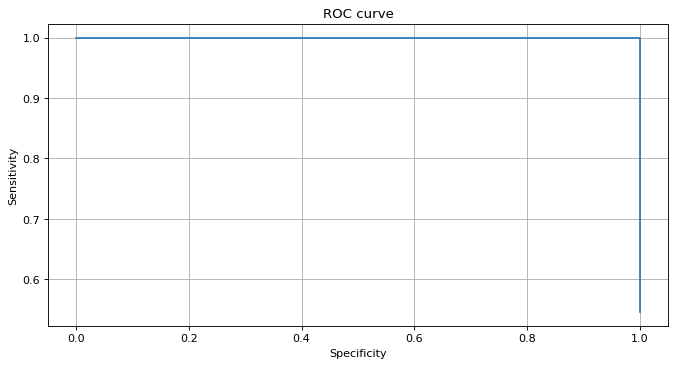

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(specificity, sensitivity, )

plt.title("ROC Curve")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.grid()
plt.show()

### 2.10 Question 10
Now that you’ve created a logistic classifier for two features of the Iris dataset
and have created some analytic results. Select another two columns (i.e.
petal width and sepal length, or petal length and sepal width). Create
a different logistic classifier using these new columns and create the same
results as you did with questions 8 and 9.
Compare these two models trained with different columns. Which model
is best, and why do we know that it’s the best?
